Dẫn nhập machine learning: Dữ liệu nhiều (lớn)
-Dựa trên dữ liệu lịch sử (Historical Data) để xây dựng mô hình (model)
-(1)Input đi qua (2) model (Mô hình toán học) sẽ tính toán cho ra (3) output
Các bài toán phổ biến

1. Dự báo(Prediction)
Ví dụ: Ngày mai nhiệt độ là bao nhiêu
2. Phân lớp (Classification)
Ví dụ: Cho biết ngày mai trời nắng hay mưa
Ví dụ: Input điểm số toán văn output là Yes/No
3. Gom cụm(Clustering)
Ví dụ: Dựa vào sức mua của khách hàng, hãy phân bổ khách hàng
4. Luật kết hợp(Association rules)
Ví dụ: Mua sữa, tã, bánh, sẽ khuyến nghị khách mua thêm gì đó
Xác định Input: Dữ liệu đầu vào có những gì ?
Xác định tiếp theo Output: Mục tiêu của bài toán

Các phương pháp học phổ biến
1. Supervised (Có giám sát)
-Trong tập dữ liệu bạn có (historical data) sẽ bao gồm input và output
2. un-supervised (Học không giám sát)
-Trong tập dữ liệu bạn sẽ chỉ có bao gồm input và không biết trước output
3. semi-supervised learning (Bán giám sát)
-Trong tập dữ liệu bạn sẽ chỉ có bao gồm input, nếu muốn có output mãu thì phải điều chế
Quy trình xây dựng ứng dụng machine learning

Dẫn nhập hồi quy tuyến tính

Ứng dụng trong bài toán Prediction

Bài toán 1: Hãy dự báo điểm T6 dựa trên T5
Input là T5
Output là T6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataLT/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

In [3]:
df = df[['T5','T6','NGONNGU', 'TOANLOGICPHANTICH','GIAIQUYETVANDE']]

In [4]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC', 'GIAIQUYETVANDE':'UNGXU'},inplace=True)

In [5]:
df[['T5', 'T6']].head(5)

,T5,T6
0,7.4,6.9
1,3.0,4.0
2,4.8,5.7
3,6.1,7.4
4,6.8,8.0


In [6]:
df[['T5', 'T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


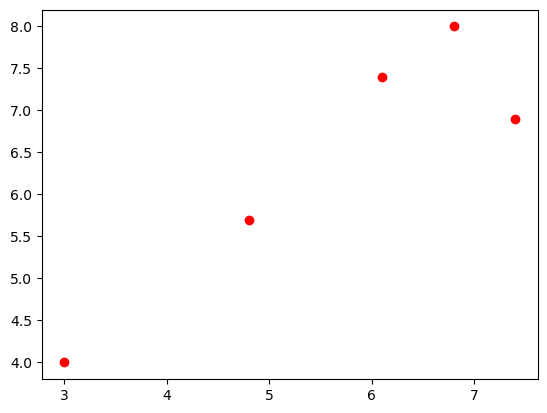

In [7]:
plt.plot(df[['T5']][0:5], df[['T6']][0:5], 'ro')
plt.show()

In [8]:
#Bài toán 2: Hãy dự báo điểm thi đánh giá năng lực phần LOGIC
#dựa trên điểm trung bình toán
#học kì 1 và 2 năm lớp 12

In [9]:
#Xây dựng mô hình machine learning 
#Bước 1: xác định bài toán
#Bước 2: xác định input và output
#Bước 3:Xác định mô hình sử dụng
#Bước 4:Chia tập dữ liệu thành 2: training và testing theo tỉ lệ 80% và 20%
#Bước 5: Huấn luyện mô hình trên tập training 
#Bước 6: đánh giá mô hình: trên tập training và tập test
#Bước 7:Triển khai mô hình
#Chọn mô hình hôi quy tuyến tính
#LOGIC = f(T5,T6) = A0 + A1*T5 + A2*T6 + epsilon

#Tập dữ liệu
X= df[['T5', 'T6']].values #input
y= df[['NGONNGU']].values #output

In [10]:
#Chia tách ra training và testing
#Chú ý random_state để thay đổi khi đi thi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1, random_state=10)

In [11]:
#Mô hình hồi quy tuyến tính đa biến
#LOGIC = A0 +A1*T5 + A2*T6 + epsilon
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#To retrive the intercept_
print(model.intercept_)

#For retriving the slope ( coefficient)
print(model.coef_)
#NGONNGU = 4.39 + 0.1 + T5 - 0.18 + T6

[4.39741865]
[[ 0.10398249 -0.18448996]]


In [13]:
pd.DataFrame(X_test).to_csv("DataLT/input_test.csv")

In [14]:
pd.DataFrame(y_test).to_csv("DataLT/output_test.csv")

In [15]:
#Tính toán giá trị điểm thi LOGIC dựa trên mô hình
import numpy as np
from sklearn import metrics

y_test_pred = model.predict(X_test)
y_test_pred

array([[3.49373364],
       [3.72350336],
       [3.8935773 ],
       [4.04754975],
       [3.9536193 ],
       [3.6664861 ],
       [3.87646757],
       [3.74429986],
       [3.9304753 ],
       [3.77650285]])

In [16]:
pd.DataFrame(y_test_pred).to_csv("output_test_pred.csv")

In [17]:
#Càng nhỏ càng tốt
print("Mean absolute Error:" , metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean squared Error:" , metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean squared Error:" , np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))

#Càng lớn càng tốt
print("Score:" , model.score(X_test, y_test))


Mean absolute Error: 0.9389937231855783
Mean squared Error: 1.7926269097774998
Root Mean squared Error: 0.9690168848815681
Score: -0.7531803518606357


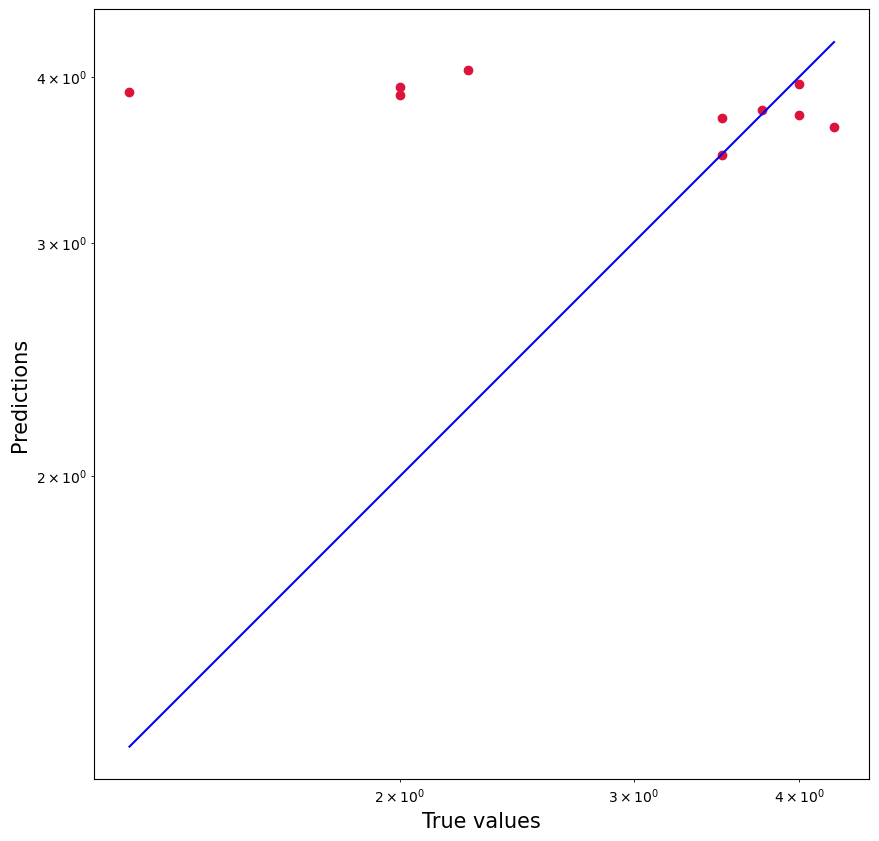

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1=max(max(y_test_pred), max(y_test))
p2=min(min(y_test_pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [19]:
import pickle
pickle.dump(model, open('DataLT/model_dubao_ngonngu.sav','wb'))

In [20]:
#Xây dựng ctrinh: Nhập điểm T5, T6 từ bàn phím

import pickle
#Load model tu storage
loaded_model = pickle.load(open('DataLT/model_dubao_ngonngu.sav','rb'))

vT5 = float(input('Nhap T5:'))
vT6 = float(input('Nhap T6:'))

predicted_vlogic = loaded_model.predict([[vT5, vT6]])

print(f'Du bao diem thi NGONNGU la {predicted_vlogic}')

Du bao diem thi NGONNGU la [[3.97140626]]


In [21]:
# AI pipepline 2
#Tập dữ liệu
X= df[['T5', 'T6']].values #input
y= df[['NGONNGU']].values #output

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [23]:
#Chú ý random_state để thay đổi khi đi thi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1, random_state=10)

In [24]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

#To retrive the intercept_
print(model.intercept_)

#For retriving the slope ( coefficient)
print(model.coef_)
#NGONNGU = 4.39 + 0.1 + T5 - 0.18 + T6

[4.02675325]
[[ 0.67588618 -1.0700418 ]]


In [25]:
vT5 = 4.0
vT6 = 3.5

scaled = sc.transform([[vT5, vT6]])

predicted_ngonngu = model.predict(scaled)

print(f'Du bao diem thi NGONNGU la {predicted_ngonngu}')
# scaled

Du bao diem thi NGONNGU la [[4.16763374]]
